In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
df = pd.read_csv(r"data\ECG5000\ECG5000_TRAIN.tsv",sep = '\t',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [5]:
df = df.rename(columns = {0:'label'})
y = pd.DataFrame(df['label'])
x = df.drop('label',axis = 1)

In [13]:
df.describe()

,label,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.5240,-0.159100,-1.551951,-2.442733,-3.098292,-3.177269,-2.899259,-2.286133,-1.800159,-1.429717,...,0.146861,0.049037,-0.085459,-0.300097,-0.552943,-0.825774,-0.929637,-0.750090,-0.602488,-0.805451
std,0.7527,1.140292,1.416321,1.400143,1.325583,1.128045,0.904602,0.697134,0.575725,0.587910,...,1.132632,1.353449,1.594624,1.857173,2.025423,2.076705,2.106171,1.955936,1.946638,1.438395
min,1.0000,-3.694197,-5.117621,-5.110389,-5.060774,-5.375715,-5.056184,-3.960660,-3.066900,-2.906713,...,-3.072255,-3.560666,-4.006379,-4.212592,-4.526051,-5.150100,-4.872557,-4.959774,-5.639460,-5.797645
25%,1.0000,-0.928707,-2.644930,-3.617218,-4.251520,-4.022823,-3.537361,-2.779345,-2.182877,-1.786397,...,-0.608483,-0.965218,-1.485576,-2.038443,-2.654917,-3.075720,-3.032576,-2.315601,-1.970478,-1.663648
50%,1.0000,-0.216883,-1.539340,-2.513000,-3.309532,-3.541513,-3.008340,-2.298235,-1.761069,-1.438962,...,0.348091,0.438875,0.652819,0.585367,0.320551,-0.125691,-0.254106,-0.292570,-0.233793,-0.663025
75%,2.0000,0.582008,-0.595632,-1.448769,-2.199136,-2.546305,-2.432860,-1.847942,-1.489967,-1.108815,...,1.046332,1.147758,1.215568,1.239330,1.186627,1.016514,0.933622,0.960665,1.002865,0.222464
max,5.0000,4.058127,2.087844,1.592974,1.423006,1.014557,0.610640,0.778013,0.812531,1.136212,...,2.960969,2.602337,2.723053,2.912394,2.630759,2.852050,2.959741,2.613987,2.589474,2.854707


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 141 entries, label to 140
dtypes: float64(140), int64(1)
memory usage: 550.9 KB


In [6]:
print(df.isnull().values.any())

False


AttributeError: 'AxesSubplot' object has no attribute 'values'

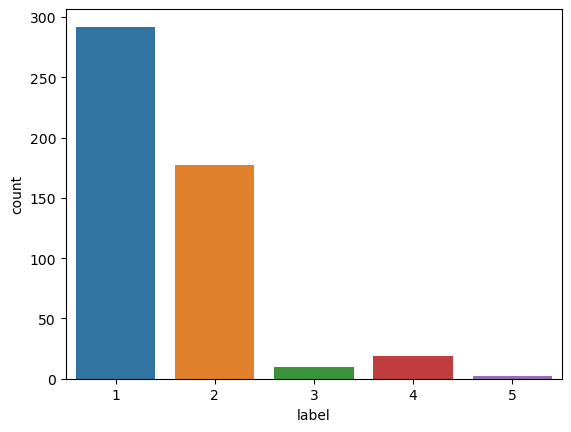

In [8]:
sns.countplot(data = df, x = 'label')

In [23]:
len(df[df['label'] == 5])

2

In [10]:
time = df.columns[1:]
print(time)


Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='object', length=140)


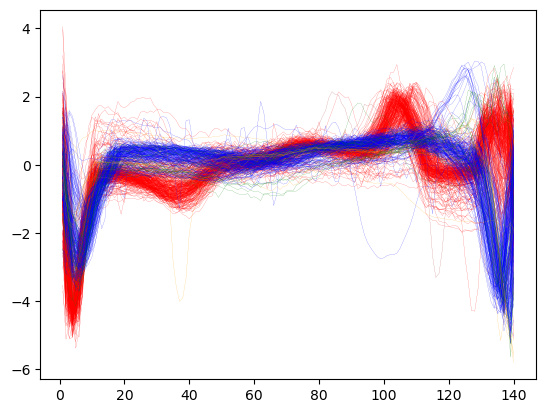

In [11]:
check = 1
plot = df[df['label'] == check]
for i in range(plot.shape[0]):
    plt.plot(time,plot.iloc[i,1:],linewidth = 0.1,c = 'r')
check = 2
plot = df[df['label'] == check]
for i in range(plot.shape[0]):
    plt.plot(time,plot.iloc[i,1:],linewidth = 0.1,c = 'b')
check = 3
plot = df[df['label'] == check]
for i in range(plot.shape[0]):
    plt.plot(time,plot.iloc[i,1:],linewidth = 0.1,c = 'orange')
check = 4
plot = df[df['label'] == check]
for i in range(plot.shape[0]):
    plt.plot(time,plot.iloc[i,1:],linewidth = 0.1,c = 'g')
check = 5
plot = df[df['label'] == check]
for i in range(plot.shape[0]):
    plt.plot(time,plot.iloc[i,1:],linewidth = 0.1,c = 'brown')

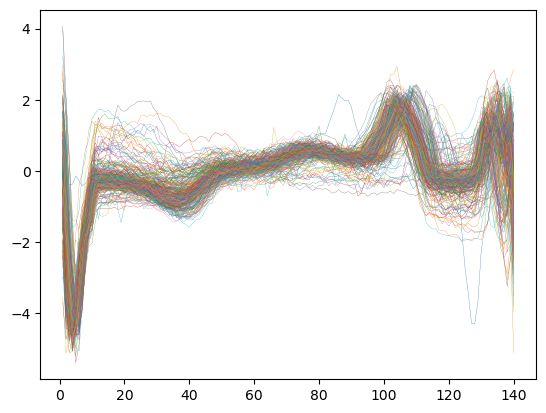

In [15]:
check = 1
plot = df[df['label'] == check]
for i in range(plot.shape[0]):
    plt.plot(time,plot.iloc[i,1:],linewidth = 0.2)